# Playing with pre-trained models in pytorch

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image

## Alexnet
<img src='images/AlexNet-1.png'></img>
Source: https://www.learnopencv.com/understanding-alexnet/<br>
See also: [Source code for torchvision.models.alexnet](https://pytorch.org/docs/stable/_modules/torchvision/models/alexnet.html)

In [2]:
alexnet = models.alexnet(pretrained=True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Playing with resnet (101 and 152)
<img src="images/residualBlock.png"><center>A residual block</center></img>
<img src="images/plainvgg_vggwithresidualblocks2.png"><center>Restnet architecture</center></img>
<br><br>Sources:<br>https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035<br>
https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624<br>
See also: [Source code for torchvision.models.resnet](https://pytorch.org/docs/stable/_modules/torchvision/models/resnet.html)

The pretrained model is downloaded the first time you call it

In [3]:
resnet101 = models.resnet101(pretrained=True)
resnet152 = models.resnet152(pretrained=True)

In [4]:
# Simply calling the model shows its architecture
resnet101

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
resnet152

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Transforms the input image to the desired format
Original Image -> 256x256 -> Crop Central 224x224 -> Convert to tensor -> Normalize RGB channels

In [6]:
myTransform = [transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.ToTensor(),
               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.255])]
preprocess = transforms.Compose(myTransform)
resizeCrop = transforms.Compose(myTransform[:2])

### Load some dog images
See [Standford dog dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)

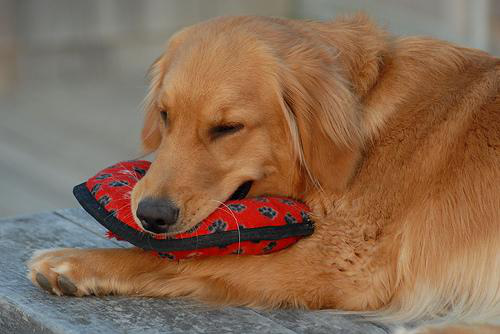

In [7]:
golden = Image.open("images/dogs/Images/n02099601-golden_retriever/n02099601_10.jpg")
# Call golden.show() if you want it on a pop up window
golden

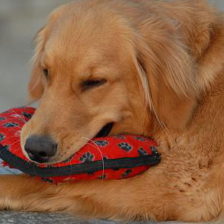

In [8]:
resizeCrop(golden)

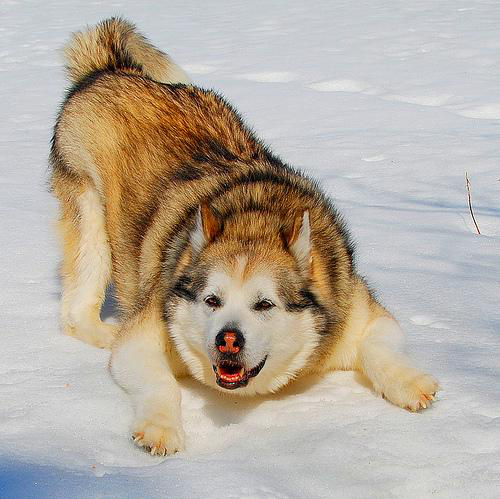

In [9]:
malamute = Image.open("images/dogs/Images/n02110063-malamute/n02110063_1034.jpg")
malamute

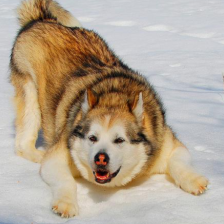

In [10]:
resizeCrop(malamute)

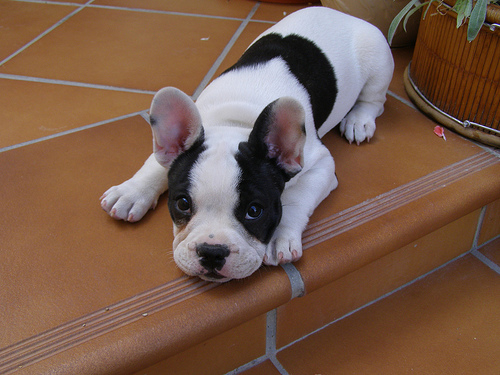

In [11]:
bulldog = Image.open("images/dogs/Images/n02108915-French_bulldog/n02108915_1137.jpg")
bulldog

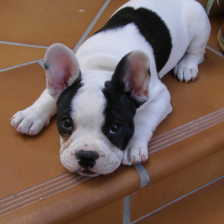

In [12]:
resizeCrop(bulldog)

In [13]:
# Preprocess and add a dimension to pass it to resnet
input_r = preprocess(golden)
batch = torch.unsqueeze(input_r, 0)

input_r.size(), batch.size()

(torch.Size([3, 224, 224]), torch.Size([1, 3, 224, 224]))

In [14]:
# Puts the network in evaluation mode
resnet101.eval()
# Gets predictions
output = resnet101(batch)
# Convert results to percentages
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

### Loading [Imagenet](https://en.wikipedia.org/wiki/ImageNet) classes
Got from [imagenet1000_clsidx_to_labels.txt](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)<br>
See also [ImageNet Large Scale Visual Recognition Challenge](https://arxiv.org/pdf/1409.0575.pdf)

In [15]:
# imagenet-classes.txt
# class;name
# 0;tench, Tinca tinca
# 1;goldfish, Carassius auratus
# 2;great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
# 3;tiger shark, Galeocerdo cuvieri
#

with open('data/imagenet-classes.txt') as img_classes:
    labels = [line.strip().split(";") for line in img_classes.readlines()]

labels = {int(label[0]):label[1] for label in labels[1:]}

### Prediction result...

In [16]:
value, index = torch.max(output, 1)
index = int(index)
print(f'Prediction: {labels[index]} - {float(percentage[index]):.2f}%')

Prediction: golden retriever - 98.26%


In [17]:
def getPrediction(image):
    batch = torch.unsqueeze(preprocess(image), 0)
    resnet152.eval()
    output = resnet152(batch)
    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
    _, index = torch.max(output, 1)
    index = int(index)
    return index, percentage[index]

def getLabel(image, labels):
    index, percentage = getPrediction(image)
    return labels[index], float(percentage)

getLabel(malamute, labels)

('malamute, malemute, Alaskan malamute', 54.680355072021484)

In [18]:
getLabel(golden, labels)

('golden retriever', 96.95616149902344)

### Get first _10_ results

In [19]:
# From previous Resnet101 results
values, indices = torch.sort(output, descending=True)
[(labels[int(index)], percentage[index]) for index in indices[0][:10]]

[('golden retriever', tensor(98.2578, grad_fn=<SelectBackward>)),
 ('Labrador retriever', tensor(0.6211, grad_fn=<SelectBackward>)),
 ('flat-coated retriever', tensor(0.2341, grad_fn=<SelectBackward>)),
 ('Tibetan mastiff', tensor(0.1328, grad_fn=<SelectBackward>)),
 ('tennis ball', tensor(0.0680, grad_fn=<SelectBackward>)),
 ('kuvasz', tensor(0.0629, grad_fn=<SelectBackward>)),
 ('muzzle', tensor(0.0572, grad_fn=<SelectBackward>)),
 ('Saluki, gazelle hound', tensor(0.0572, grad_fn=<SelectBackward>)),
 ('Brittany spaniel', tensor(0.0402, grad_fn=<SelectBackward>)),
 ('redbone', tensor(0.0364, grad_fn=<SelectBackward>))]

### Get k predictions using Resnet152

In [20]:
def get_k_predictions(image, k, predict=resnet152):
    #image.show()
    batch = torch.unsqueeze(preprocess(image), 0)
    predict.eval()
    output = predict(batch)
    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
    _, indices = torch.sort(output, descending=True)
    first_k_percentages = [float(percentage[index]) for index in indices[0][:k]]
    return indices[0][:k], first_k_percentages

def get_k_labels(image, k, labels, predict=resnet152):
    indices, percentages = get_k_predictions(image, k, predict=predict)
    labels = [labels[int(index)] for index in indices]
    return labels, indices, percentages

In [21]:
get_k_labels(malamute, 5, labels)

(['malamute, malemute, Alaskan malamute',
  'Eskimo dog, husky',
  'Siberian husky',
  'dogsled, dog sled, dog sleigh',
  'Norwegian elkhound, elkhound'],
 tensor([249, 248, 250, 537, 174]),
 [54.680355072021484,
  30.505393981933594,
  9.494248390197754,
  4.488727569580078,
  0.3268951177597046])

In [22]:
get_k_labels(bulldog, 5, labels)

(['French bulldog',
  'Boston bull, Boston terrier',
  'toy terrier',
  'Chihuahua',
  'boxer'],
 tensor([245, 195, 158, 151, 242]),
 [99.94818878173828,
  0.034917622804641724,
  0.008208319544792175,
  0.002586670685559511,
  0.0020422053057700396])

In [23]:
get_k_labels(golden, 5, labels)

(['golden retriever',
  'redbone',
  'Labrador retriever',
  'tennis ball',
  'flat-coated retriever'],
 tensor([207, 168, 208, 852, 205]),
 [96.95616149902344,
  0.5251303911209106,
  0.30999910831451416,
  0.29988959431648254,
  0.24851693212985992])

In [24]:
get_k_labels(golden, 5, labels, predict=resnet101)

(['golden retriever',
  'Labrador retriever',
  'flat-coated retriever',
  'Tibetan mastiff',
  'tennis ball'],
 tensor([207, 208, 205, 244, 852]),
 [98.25782775878906,
  0.6210775375366211,
  0.23409812152385712,
  0.1328134983778,
  0.06798206269741058])

In [25]:
get_k_labels(golden, 5, labels, predict=alexnet)

(['golden retriever',
  'Labrador retriever',
  'Tibetan mastiff',
  'redbone',
  'chow, chow chow'],
 tensor([207, 208, 244, 168, 260]),
 [83.56149291992188,
  10.19076156616211,
  2.23178768157959,
  1.228371500968933,
  0.4485316574573517])